In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model


In [32]:
df=pd.read_csv('newPremium.csv')
df

,age,height,weight,permium
0,25,162.56,70,18000
1,30,172.72,86,36500
2,35,157.64,78,38000
3,40,NaN,110,60000
4,45,157.48,75,55000
5,50,NaN,66,70000
6,55,155.54,67,86000


In [33]:
mean_height=df.height.mean()

In [34]:
df.height=df.height.fillna(mean_height)

In [35]:
df

,age,height,weight,permium
0,25,162.560,70,18000
1,30,172.720,86,36500
2,35,157.640,78,38000
3,40,161.188,110,60000
4,45,157.480,75,55000
5,50,161.188,66,70000
6,55,155.540,67,86000


In [36]:
df.rename(columns={'permium': 'premium'}, inplace=True)

In [37]:
print(df)

   age   height  weight  premium
0   25  162.560      70    18000
1   30  172.720      86    36500
2   35  157.640      78    38000
3   40  161.188     110    60000
4   45  157.480      75    55000
5   50  161.188      66    70000
6   55  155.540      67    86000


In [38]:
reg = linear_model.LinearRegression()

In [39]:
reg.fit(df[['age', 'height', 'weight']], df['premium'])

LinearRegression()

In [40]:
reg.coef_

array([2296.82085214,  487.22171091,  230.36140487])

In [41]:
reg.intercept_

-136644.1980086421

In [42]:
reg.predict([[27,167.56,60]])

C:\Users\biraj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20830.51917221])

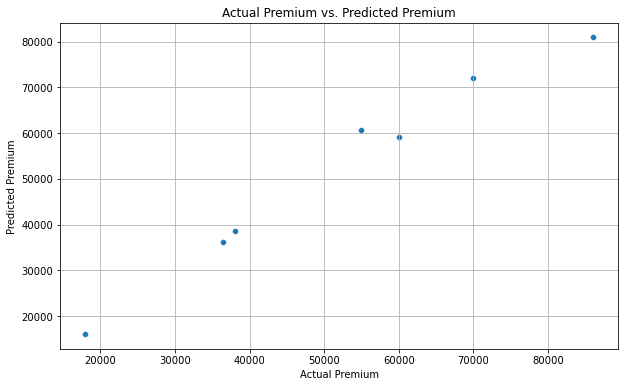

In [44]:
predicted_premiums = reg.predict(df[['age', 'height', 'weight']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['premium'], y=predicted_premiums)
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Actual Premium vs. Predicted Premium')
plt.grid(True)
plt.show()